In [1]:
import os

import matplotlib.pyplot as plt

from matplotlib.colors import LightSource
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d.art3d import pathpatch_2d_to_3d
import numpy as np
import pickle
import seaborn as sns
sns.set(style='white', font_scale=1.25,
        rc={'text.usetex' : True,
            'font.family': 'serif'})

In [2]:
%matplotlib widget

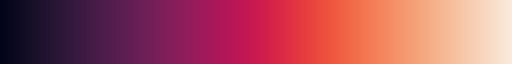

In [3]:
# constants
elev = 25
azim = 50
cmap = sns.color_palette('rocket', as_cmap=True)
cmap

In [99]:
# data
fname = os.path.join('data', 'model', 'head.scaled')
points = np.loadtxt(fname + '.xyz') 
normals = np.loadtxt(fname + '.normals')
mesh = o3d.io.read_triangle_mesh(fname + '.iso.watertight.off')
vert = np.asarray(mesh.vertices)
tri = np.asarray(mesh.triangles)

In [127]:
# a single source
def generate_power_density(amplitude,
                           radius,
                           query_point,
                           points,
                           scaler=[1, 1, 1]):
    distance = np.linalg.norm((points - query_point)
                              / np.array(scaler),
                          axis=1)
    return amplitude * np.exp(-(distance / radius))

In [156]:
from scipy.spatial import KDTree
tree = KDTree(points)
query_point = points[points[:, 0].argmax(), :].copy()
neighbors = tree.query_ball_point(query_point, r=5)
ind = np.random.choice(neighbors, 5)

In [159]:
amplitudes = [5, 10, 15, 30]
radii = [0.5, 0.5, 0.5, 0.5]
query_points = points[ind]
power_density = np.zeros((points.shape[0], ))
for a, r, qp in zip(amplitudes, radii, query_points):
    power_density += generate_power_density(a, r, qp, points)

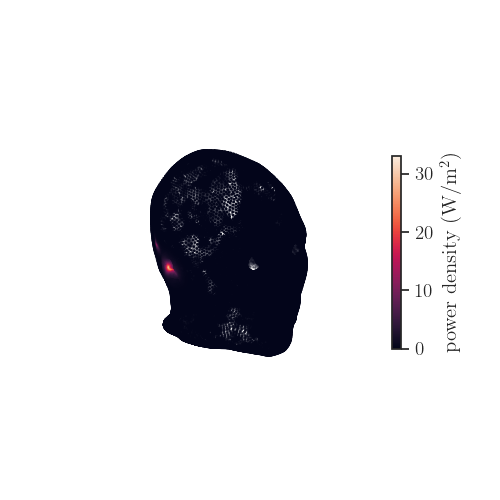

In [160]:
plt.close()
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
s = ax.scatter(*points.T, c=power_density, cmap=cmap, s=1)
cbar = fig.colorbar(s, ax=ax, pad=0, shrink=0.5,
                    label='power density (W/m$^2$)')
#cbar.set_ticks(cbar_ticks)
ax.set_box_aspect(np.ptp(points, axis=0))
ax.set(xlabel='x', ylabel='y')
ax.set_axis_off()
ax.view_init(25, 50)
plt.show()

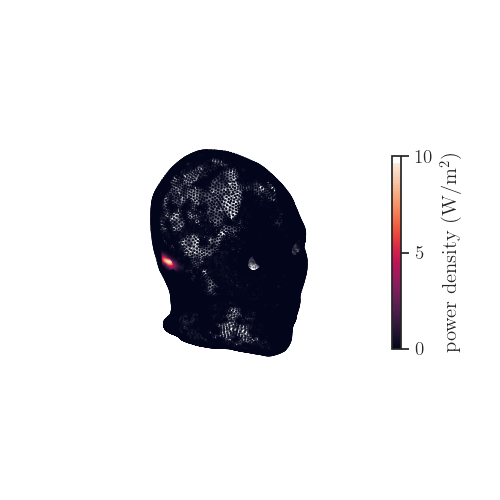

In [97]:
plt.close()
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
s = ax.scatter(*points.T, c=pd, cmap=cmap, s=0.5)
cbar = fig.colorbar(s, ax=ax, pad=0, shrink=0.5,
                    label='power density (W/m$^2$)')
cbar.set_ticks(cbar_ticks)
ax.set_box_aspect(np.ptp(points, axis=0))
ax.set(xlabel='x', ylabel='y')
ax.set_axis_off()
ax.view_init(25, 50)
plt.show()

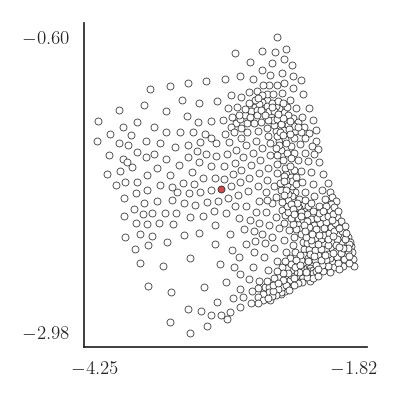

In [45]:
plt.close()
fig = plt.figure(figsize=(4, 4))
ax = plt.axes()
ax.scatter(*nbh[(nbh != p).all(axis=1), 1:].T,
           fc='w', ec='k', s=25, lw=0.5)
ax.scatter(*p[1:],
           fc='r', ec='k', s=25, lw=0.5)
ax.set(xticks=ylim, yticks=zlim)
sns.despine()
plt.tight_layout()
plt.show()

In [46]:
idx_at_ymin = np.argmin(nbh[:, 1])
ymin = nbh[idx_at_ymin, 1]
z_at_ymin = nbh[idx_at_ymin, 2]

idx_at_zmin = np.argmin(nbh[:, 2])
zmin = nbh[idx_at_zmin, 2]
y_at_zmin = nbh[idx_at_zmin, 1]

d = z_at_ymin - zmin
r = np.sqrt(np.sqrt(area))
angle_rad = 2 * np.arcsin(d / (2 * r))
angle = np.rad2deg(angle_rad)
angle

65.75000190263023

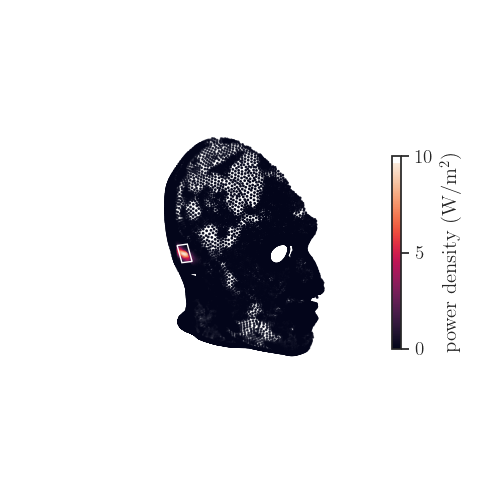

In [47]:
# point cloud - search space
plt.close()
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
s = ax.scatter(*points[ind].T, c=pd[ind], cmap=cmap, s=1)
cbar = fig.colorbar(s, ax=ax, pad=0, shrink=0.5,
                    label='power density (W/m$^2$)')
cbar.set_ticks(cbar_ticks)
square = Rectangle(xy=(ymin, z_at_ymin),
                   width=np.sqrt(area),
                   height=np.sqrt(area),
                   angle=-angle,
                   ec='w', fc='none')
ax.add_patch(square)
pathpatch_2d_to_3d(square, z=p[0], zdir='x')
ax.set_box_aspect(np.ptp(points[ind], axis=0))
ax.set(xlabel='x', ylabel='y')
ax.set_axis_off()
ax.view_init(25, 50)
plt.show()

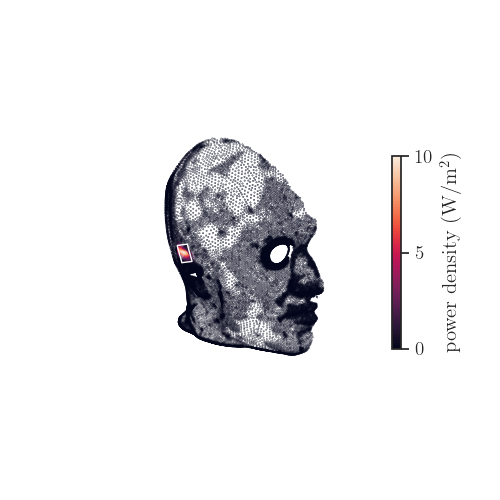

In [92]:
# point cloud - search space
plt.close()
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
s = ax.scatter(*points[ind].T, c=power_density[ind], cmap=cmap, s=1)
cbar = fig.colorbar(s, ax=ax, pad=0, shrink=0.5,
                    label='power density (W/m$^2$)')
cbar.set_ticks(cbar_ticks)
square = Rectangle(xy=(ymin, z_at_ymin),
                   width=np.sqrt(area),
                   height=np.sqrt(area),
                   angle=-angle,
                   ec='w', fc='none')
ax.add_patch(square)
pathpatch_2d_to_3d(square, z=p[0], zdir='x')
ax.set_box_aspect(np.ptp(points[ind], axis=0))
ax.set(xlabel='x', ylabel='y')
ax.set_axis_off()
ax.view_init(25, 50)
plt.show()